## 1.0.1 Abstract

This paper examines the relationship between CPI and the impact of Brexit using British data over the period 1970–2022. Uncertainty is proxied using the estimated conditional volatility from symmetric ARIMA GARCH-M model and Synthetic Control Linear Regression model of CPI. The results indicate a positive relationship between past CPI and current uncertainty. We control the CPI targets over the past decade and found that adopting clear targets removes CPI persistence and reduces long-term uncertainty. After leaving the EU system, the UK monetary policy and fiscal policy changed, resulting in a change in the trend of the CPI.

## 2.0.1 Introduction

In the 1990s a number of countries adopted explicit inflation targeting (IT) monetary policy frameworks. Over the same period, their inflation rates became lower and less variable, which points out a slower rate of CPI growth and lower volatility of CPI change. The reduction in CPI and CPI variance seems to be more generalised since it is observed both in EU countries and in non-EU countries. Cecchetti and Ehrmann (2000) argue that over the last decade, aversion to CPI variability increased in all major economies irrespective of whether they were operating under IT or not. Higher non-forecastable CPI variability increases inflationary uncertainty and induces significant economics costs by distorting the intertemporal and intratemporal allocation decisions of individuals and firms, by re-distributing wealth between debtors and creditors and by reducing the effectiveness of relative prices in co-ordinating economic actions.

Friedman (1977) suggests a positive correlation between the volatility of CPI and inflation uncertainty, with higher volatility of CPI leading to greater uncertainty and lower output growth. After the UK quites the European Union, the UK is no longer bound by EU law, the European single market and several free trade agreements, and can take back control over immigration policy. Ball (1992) formalises Friedman's argument in the context of an asymmetric information game between the public and the policy maker. The empirical relationship between average CPI change rate and CPI uncertainty has been studied extensively throughout the last 3 decades, with the results largely accepting the Friedman–Ball prediction. Thus, policies that lower average CPI change rate lead to lower CPI uncertainty with apparent economic benefits.

In this paper we take a closer look at the effect of Brexit on average CPI using British data over the period 1970–2022. The United Kingdom (UK) was among the first major economies to adopt explicit targeting in October 1992 and to leave EU in Jounary 2022. We employ a variety of ARIMA GARCH-related models to account for time-varying CPI volatility. GARCH techniques are popular in empirical investigations of the inflation–uncertainty relationship, since the estimated conditional volatility can serve as a proxy for uncertainty. Furthermore, given the importance of long-run price stability, we use component ARIMA GARCH models to decompose inflation uncertainty into a temporary or a permanent component and examine whether past CPI and Breixt affect long-run uncertainty. The results have important implications for the design of monetary policy given the decade-long EU way's policies' experience. This study’s major contribution to the existing literature is the finding that, even if we take into account the indirect effect of lower
average CPI growth, the adoption of Brexit a direct postive impact on CPI volatility, thereby promoting macroeconomic stability.

Citation

1. A. Kontonikas,Inflation and inflation uncertainty in the United Kingdom, evidence from GARCH modelling,Economic Modelling, Volume 21, Issue 3, 2004, Pages 525-543, ISSN 0264-9993
2. Cecchetti, S., Ehrmann, M., 2000. Does inflation targeting increase output volatility? An international comparison of policymakers’ preferences and outcomes. Central Bank of Chile Working Paper 69
3. M. Friedman. Nobel lecture: inflation and unemployment J. Polit. Econ., 85 (1977), pp. 451-472 
4. L. Ball. Why does higher inflation raise inflation uncertainty? J. Monetary Econ., 29 (1992), pp. 371-378

Install Packag

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
import pmdarima as pm
from datetime import datetime
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")
!pip install arch

pd.set_option("display.max_columns", 6)
plt.style.use('ggplot')

## 3.0.1 Reading Data

Data Citation

1. U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, May 5, 2022.
2. Organization for Economic Co-operation and Development, Consumer Price Index of All Items in the United Kingdom [GBRCPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GBRCPIALLMINMEI, May 6, 2022.
3. Organization for Economic Co-operation and Development, Consumer Price Index of All Items in France [FRACPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FRACPIALLMINMEI, May 6, 2022.
4. Organization for Economic Co-operation and Development, Consumer Price Index of All Items in Italy [ITACPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ITACPIALLMINMEI, May 6, 2022.
5. Organization for Economic Co-operation and Development, Consumer Price Index: All Items for Finland [FINCPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FINCPIALLMINMEI, May 6, 2022
6. Organization for Economic Co-operation and Development, Consumer Price Index: All Items for Switzerland [CHECPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CHECPIALLMINMEI, May 6, 2022.
7. Organization for Economic Co-operation and Development, Consumer Price Index: All Items for Denmark [DNKCPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DNKCPIALLMINMEI, May 6, 2022.
8. Organization for Economic Co-operation and Development, Consumer Price Index of All Items in Germany [DEUCPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/DEUCPIALLMINMEI, May 6, 202

Data Baseline

- Source: Organization for Economic Co-operation and Development  Release: Main Economic Indicators  
- Units:  Index 1970=100, Not Seasonally Adjusted

- Frequency:  Monthly

- Copyright, 2016, OECD. Reprinted with permission.

CPI data of various European countries from 1970 to 2020 were used as the training group, and ARIMA model was used to predict the VALUE of CPI after Brexit. Then SMC model was used to simulate CPI data of the UK with data from other EU countries. To identify changes and growth trends in CPI volatility by comparing the differences before and after Brexit.

In [2]:
df= pd.read_csv('INF3.csv')
df.index  = pd.to_datetime(df.DATE,format='%m/%d/%Y')
data=df.drop('DATE',axis=1)
print(data)
training_set = data['1-1-1970' : '12-1-2019']
print(training_set)

                UK_INF
DATE                  
1970-01-01   100.00000
1970-02-01   100.51661
1970-03-01   101.10701
1970-04-01   102.65683
1970-05-01   102.95203
...                ...
2021-10-01  1394.81356
2021-11-01  1403.42352
2021-12-01  1410.80349
2022-01-01  1409.57349
2022-02-01  1419.41345

[626 rows x 1 columns]
                UK_INF
DATE                  
1970-01-01   100.00000
1970-02-01   100.51661
1970-03-01   101.10701
1970-04-01   102.65683
1970-05-01   102.95203
...                ...
2019-08-01  1332.08385
2019-09-01  1333.31385
2019-10-01  1332.08385
2019-11-01  1334.54384
2019-12-01  1334.54384

[600 rows x 1 columns]


ARIMA Model

## 4.0.1 White Noise Check & Time Series Plot
- The result show the p-value less than 0.05，so it passed the white noise test.

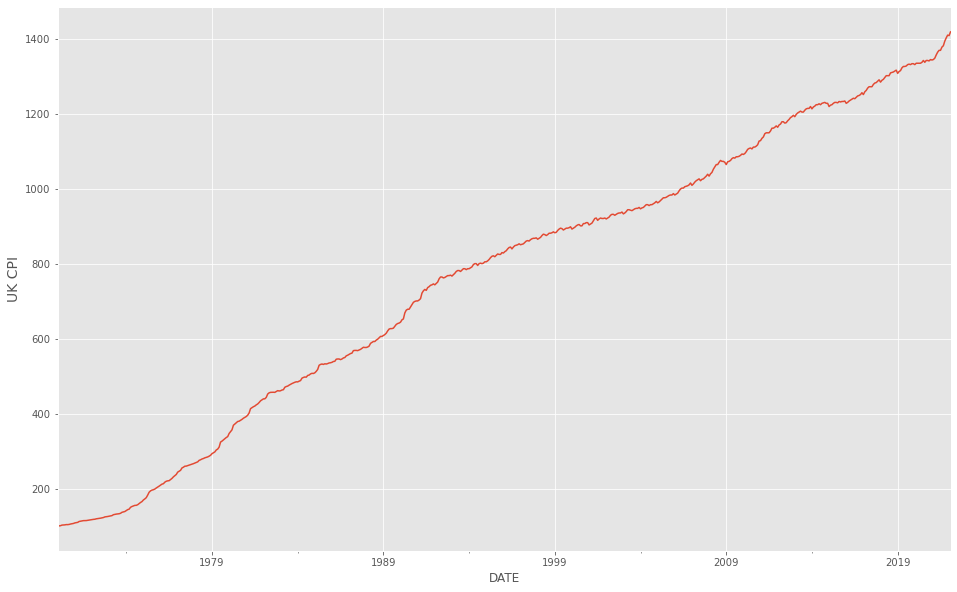

(array([622.93419667]), array([1.72021399e-137]))


In [3]:
plt.figure(figsize = (16,10))
plt.xlabel('Date',fontsize=12,verticalalignment='top')
plt.ylabel('UK CPI',fontsize=14,horizontalalignment='center')
data["UK_INF"].plot()
plt.show()
print(acorr_ljungbox(data["UK_INF"], lags=1)) 

## 4.1.1 Data Stationary Check
- The plot shows a obvious upward trend. The Time Sercise seems not stationary.
- The ADF test result show the p-value as 0.948，so it is not Stationary Series.

<Figure size 432x288 with 0 Axes>

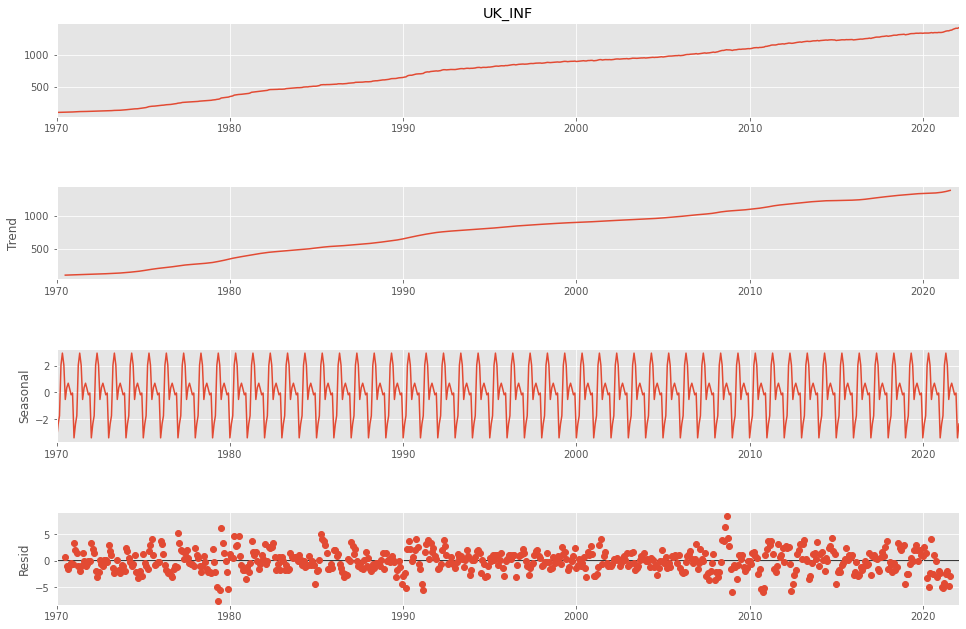

In [4]:
decomposition = seasonal_decompose(data["UK_INF"], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10)

<Figure size 1080x720 with 0 Axes>

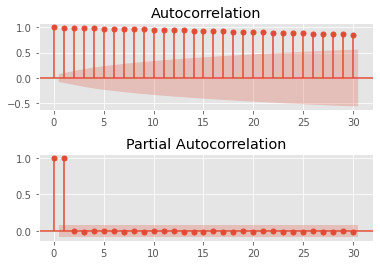

In [5]:
def draw_acf_pacf(ts,lags):
    
    plt.figure(figsize=(15, 10))

    f = plt.figure(facecolor='white')

    ax1 = f.add_subplot(211)

    plot_acf(ts,ax=ax1,lags=lags)

    ax2 = f.add_subplot(212)

    plot_pacf(ts,ax=ax2,lags=lags)

    plt.subplots_adjust(hspace=0.5)

    plt.show()

draw_acf_pacf(data["UK_INF"],30)

## 4.2.1 Difference & the ACF & the PACF 
- The p-value is 0.01 <0.05, so it is Stationary Series after one time difference.

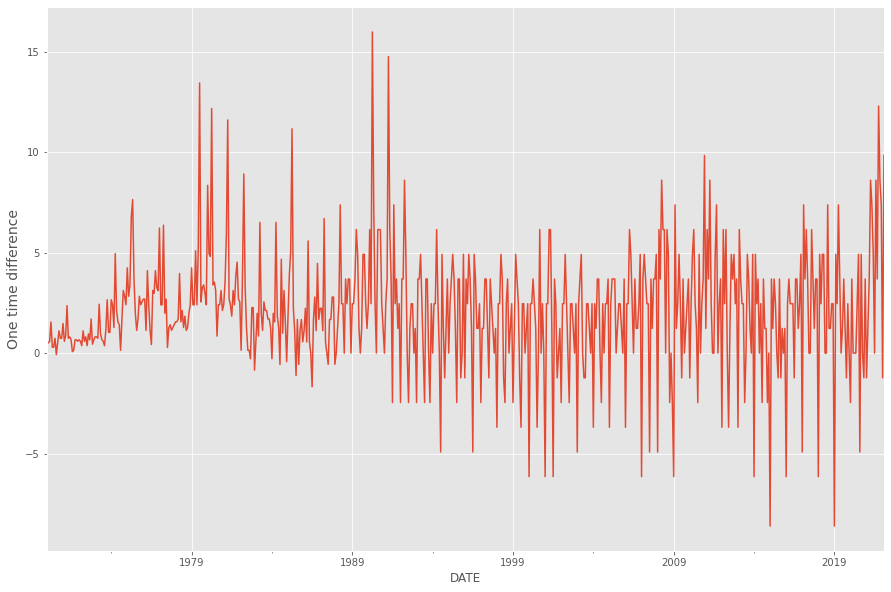

In [6]:
data_diff=data["UK_INF"].diff(1)
plt.figure(figsize=(15, 10))
data_diff.plot()
plt.ylabel('One time difference',fontsize=14,horizontalalignment='center')
plt.show()

data_diff1 = np.diff(data["UK_INF"])

<Figure size 1080x720 with 0 Axes>

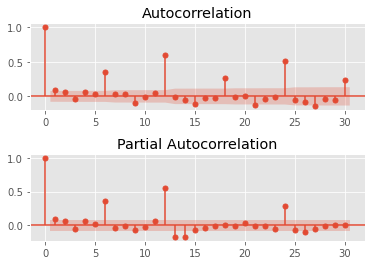

In [7]:
def draw_acf_pacf(ts,lags):
    
    plt.figure(figsize=(15, 10))

    f = plt.figure(facecolor='white')

    ax1 = f.add_subplot(211)

    plot_acf(ts,ax=ax1,lags=lags)

    ax2 = f.add_subplot(212)

    plot_pacf(ts,ax=ax2,lags=lags)

    plt.subplots_adjust(hspace=0.5)

    plt.show()

draw_acf_pacf(data_diff1,30)

## 4.3.1 ARIMA(p,d,q) Define with Smallest AIC & Model Result
- The best model is ARIMA(order=(2, 1, 2))

In [8]:
model=pm.auto_arima(training_set,trace=True)
model
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2849.801, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2949.485, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2946.388, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2946.740, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3202.596, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2876.194, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2882.805, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2878.437, Time=0.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2871.549, Time=0.65 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2948.232, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2871.082, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2877.501, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2891.423, Time=0.22 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1418.901
Date:                Fri, 06 May 2022   AIC                           2849.801
Time:                        09:53:28   BIC                           2876.173
Sample:                             0   HQIC                          2860.068
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0055      0.108     18.536      0.000       1.793       2.218
ar.L1          0.9917      0.005    185.562      0.000       0.981       1.002
ar.L2         -0.9920      0.006   -168.067      0.000      -1.004      -0.980
ma.L1         -0.9550      0.016    -58.559      0.000      -0.987      -0.923
ma.L2          0.9637      0.017     57.851      0.000       0.931       0.996
sigma2         6.2828      0.242     25.928      0.000       5.808       6.758
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               241.79
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4.4.1 Residual white noise check and diagnostics
- P-Value is 64720955>>0.05 ,so the residual is white noise.
- The residual distribution is close to normal distribution. But the QQ plot shows there might be ARCH effect.

(array([0.21288795]), array([0.64451322]))


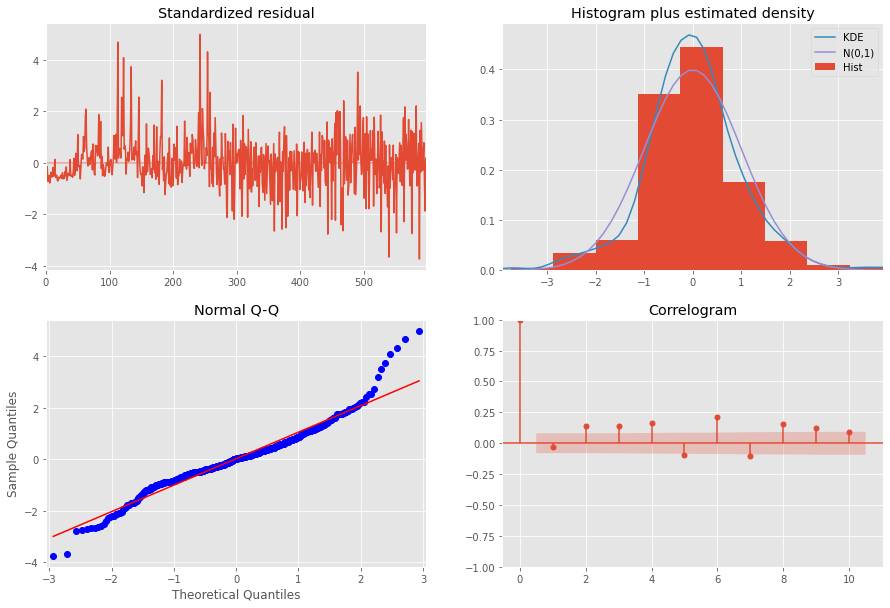

In [9]:
from statsmodels.stats.diagnostic import acorr_ljungbox
resid = model.resid()
print(acorr_ljungbox(resid, lags=1)) 

model.plot_diagnostics(figsize = (15, 10))
plt.show()

## 4.5.1 Predict with ARIMA Model & Visualiation

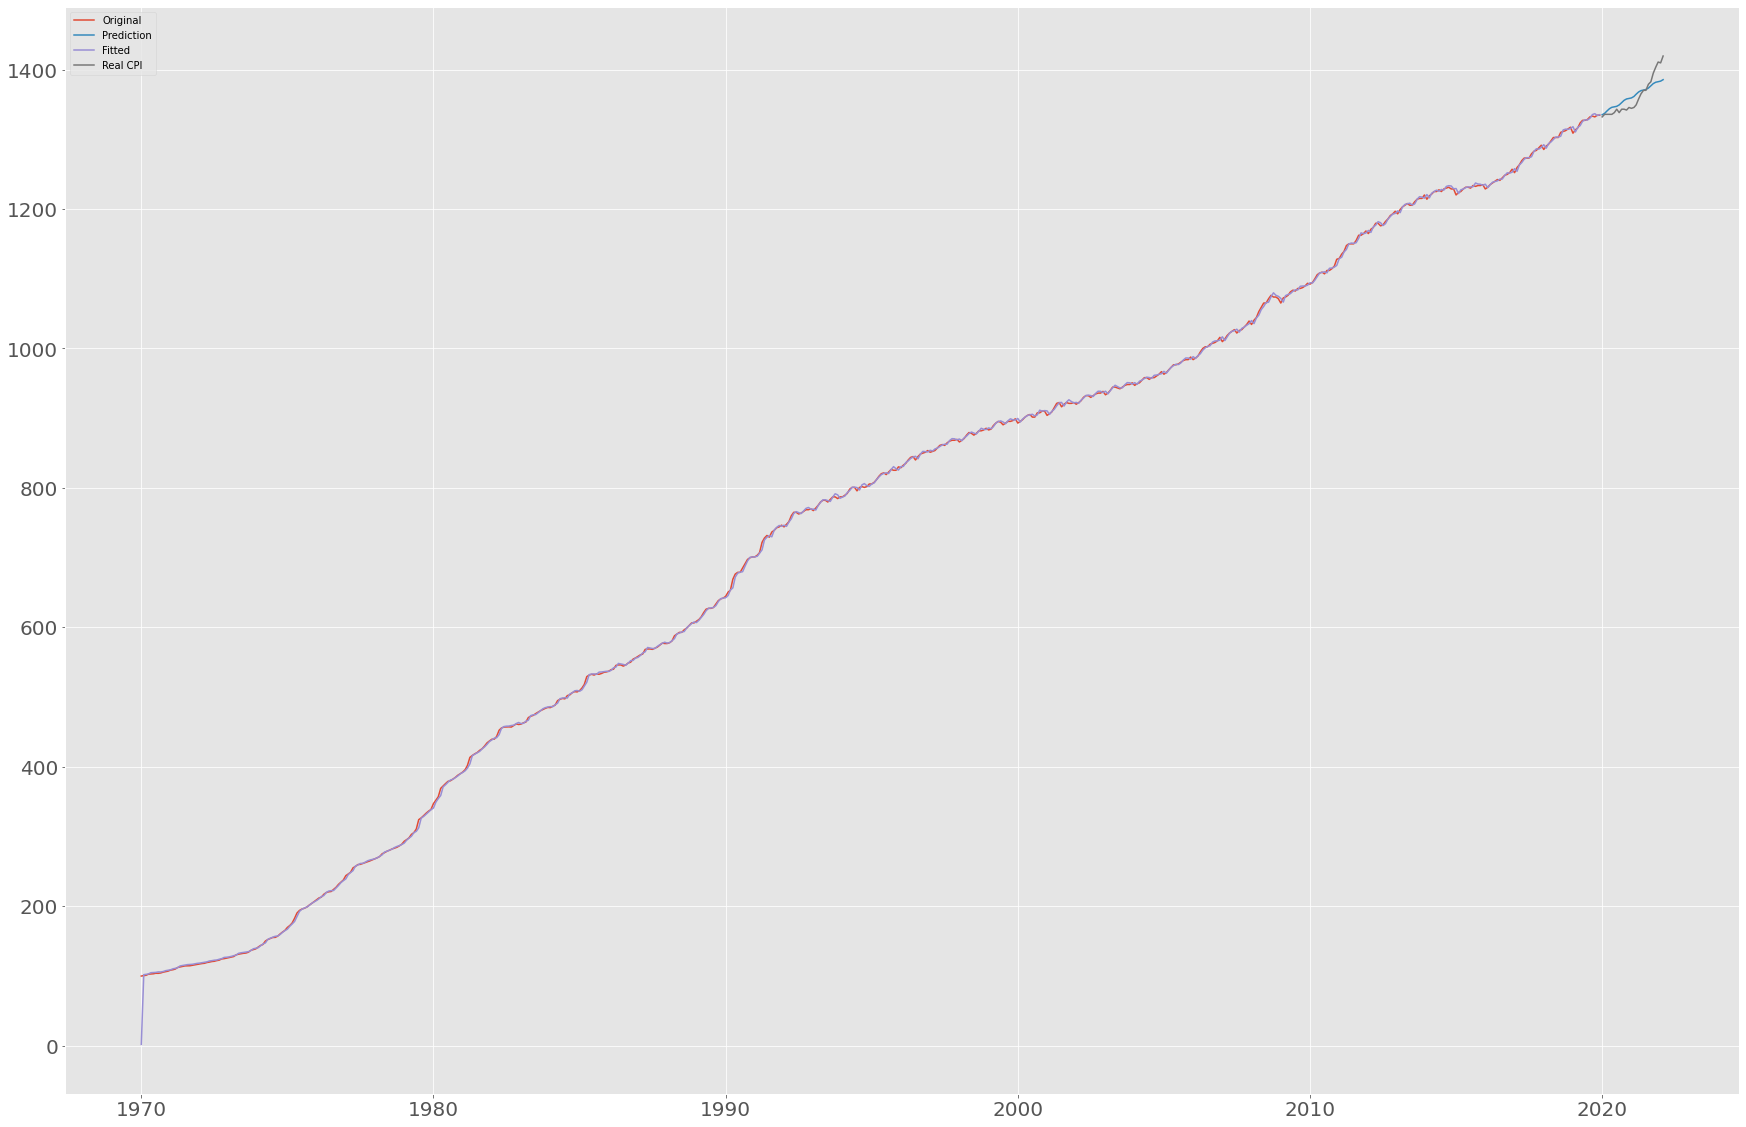

In [10]:
model.predict(n_periods=26)

fitted = pd.DataFrame(np.array(training_set.values.T-resid).T,index = training_set.index,columns=['fitted'])
fitted

forecast = model.predict(n_periods=26)
forecast = pd.DataFrame(forecast,index = pd.date_range('2020-1-1',periods=26,freq='MS'),columns=['Prediction'])
forecast

real_data = data['2020-1-1' : '2022-2-1']
real_data

fig=plt.figure(figsize = (30,20))
ax1=fig.add_subplot(1,1,1) 
plt.plot(training_set, label='Original')
plt.plot(forecast, label='Prediction')
plt.plot(fitted,label="Fitted")
plt.plot(real_data,label="Real CPI")
plt.tick_params(axis='both',which='major', labelsize=20)
plt.legend()
plt.show()

## 4.6.1 MAPE Index & ARIMA(2,1,2)-GARCH(1,1) Model Fitting
- MAPE show the 0.507%,the model is in very good performance.
- LM test shows the resideual has ARCH effect. Try to use standard GARCH(1,1) model to fit the residual.

In [11]:
MSE = np.mean(np.square(training_set.values - fitted.values))
RMSE = np.sqrt(np.mean(np.square(training_set.values - fitted.values)))
MAE = np.mean(np.abs(training_set.values - fitted.values))
MAPE = np.mean(np.abs((training_set.values - fitted.values) / training_set.values)) * 100
print (MSE,RMSE,MAE,MAPE)

22.653753912137383 4.759595982028031 2.01984355961569 0.5101633022670704


LM-test-Pvalue: 0.00000


<Figure size 1080x720 with 0 Axes>

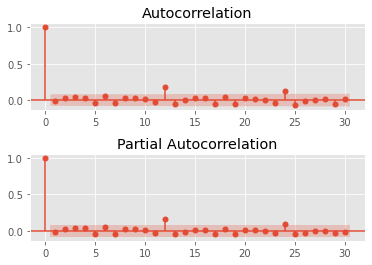

In [12]:
from statsmodels.stats.diagnostic import het_arch
LM_pvalue = het_arch(resid, ddof = 4)[1]
print('LM-test-Pvalue:', '{:.5f}'.format(LM_pvalue))

draw_acf_pacf(resid,30)

In [13]:
from arch.univariate import arch_model
garch = arch_model(resid, mean='constant', p=1, o=0, q=1,vol='GARCH')
garch_model=garch.fit()
garch_model.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44015.22556136864
Iteration:      2,   Func. Count:     13,   Neg. LLF: 439403955.3512202
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2074.322248993406
Iteration:      4,   Func. Count:     26,   Neg. LLF: 1462.4605154353865
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1444.7149507651793
Iteration:      6,   Func. Count:     37,   Neg. LLF: 1443.8292448475472
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1442.1248992687015
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1442.0341583063628
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1441.9770914535088
Iteration:     10,   Func. Count:     58,   Neg. LLF: 1441.9389809618408
Iteration:     11,   Func. Count:     63,   Neg. LLF: 1441.9323678230799
Iteration:     12,   Func. Count:     68,   Neg. LLF: 1441.931938056112
Iteration:     13,   Func. Count:     73,   Neg. LLF: 1441.931922939948
Iteration:     14,   Func. Count:     78,   Neg. LLF: 14

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1441.93
Distribution:                  Normal   AIC:                           2891.86
Method:            Maximum Likelihood   BIC:                           2909.45
                                        No. Observations:                  600
Date:                Fri, May 06 2022   Df Residuals:                      599
Time:                        09:53:29   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0727      0.106      0.683      0.495 [ -0.136,  0.281]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          2.9733      0.826      3.598  3.212e-04      [  1.353,  4.593]
alpha[1]   6.8129e-10  1.621e-02  4.202e-08      1.000 [-3.178e-02,3.178e-02]
beta[1]        0.5561      0.126      4.404  1.065e-05      [  0.309,  0.804]
=============================================================================

Covariance estimator: robust
"""

Synthetic Control Model

## 5.0.1 Install Package for SMC

In [14]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

pd.set_option("display.max_columns", 6)

## 5.1.1 Read Data

In [15]:
df= pd.read_csv('INF1.csv')
df.index  = pd.to_datetime(df.DATE,format='%m/%d/%Y')
data=df.drop('DATE',axis=1)
print(data)
#date without UK
dfn= pd.read_csv('INF4.csv')
dfn.index  = pd.to_datetime(df.DATE,format='%m/%d/%Y')
datan=dfn.drop('DATE',axis=1)
print(datan)

                 Italy         US          UK  ...    Germany  Switzerland  \
DATE                                           ...                           
1970-01-01   100.00000  100.00000   100.00000  ...  100.00000    100.00000   
1970-02-01   100.81448  100.52770   100.51661  ...  100.22272    100.00000   
1970-03-01   101.17647  101.05541   101.10701  ...  100.66815    100.18162   
1970-04-01   101.62896  101.58311   102.65683  ...  101.11359    100.08949   
1970-05-01   102.08145  101.84697   102.95203  ...  101.11359    101.08447   
...                ...        ...         ...  ...        ...          ...   
2021-10-01  1904.80437  729.78892  1394.81356  ...  377.98439    305.28555   
2021-11-01  1915.62712  734.89182  1403.42352  ...  377.30149    305.40334   
2021-12-01  1922.84229  739.11873  1410.80349  ...  379.35018    305.09233   
2022-01-01  1953.50676  743.88654  1409.57349  ...  380.71598    305.61489   
2022-02-01  1971.54468  749.82058  1419.41345  ...  384.13047   

## 5.2.1 Stimulate with Synthetic Model & Visualiation

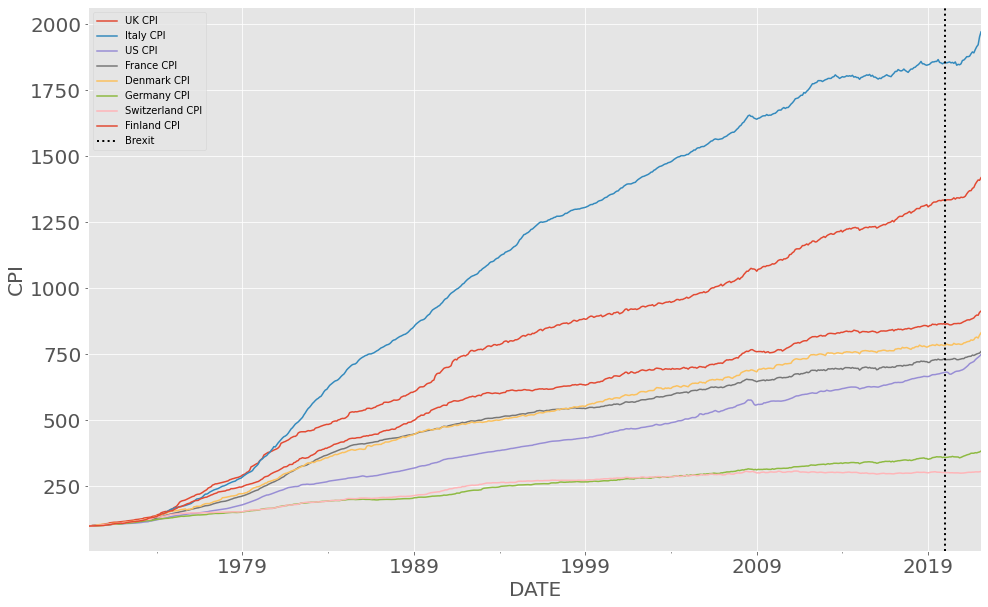

In [16]:
Italy = data.iloc[:, lambda df: [0]]
US = data.iloc[:, lambda df: [1]]
UK = data.iloc[:, lambda df: [2]]
France = data.iloc[:, lambda df: [3]]
Denmark = data.iloc[:, lambda df: [4]]
Germany = data.iloc[:, lambda df: [5]]
Switzerland = data.iloc[:, lambda df: [6]]
Finland = data.iloc[:, lambda df: [7]]
plt.figure(figsize = (16,10))
ax1 = plt.subplot(1,1,1) 
plt.xlabel('Date',fontsize=20,verticalalignment='top')
plt.ylabel('CPI',fontsize=20,horizontalalignment='center')

data["UK"].plot(label='UK CPI')
data["Italy"].plot(label='Italy CPI')
data["US"].plot(label='US CPI')
data["France"].plot(label='France CPI')
data["Denmark"].plot(label='Denmark CPI')
data["Germany"].plot(label='Germany CPI')
data["Switzerland"].plot(label='Switzerland CPI')
data["Finland"].plot(label='Finland CPI')

#plt.vlines(x=2020, ymin=0, ymax=2000, linestyle=":", lw=2, label="Brexit", color="Black")
plt.axvline(pd.to_datetime('2020-01-01'), linestyle=':', lw=2,label="Brexit", color="Black")
plt.tick_params(axis='both',which='major', labelsize=20)
plt.legend()
plt.show()

In [17]:
y = UK.values
X1 = Italy.values
X2 = US.values
X3 = France.values
X4 = Denmark.values
X5 = Germany.values
X6 = Switzerland.values
X7 = Finland.values
X = datan.values

## 5.3.1 Sklearn Linear Model & Weight Matrix

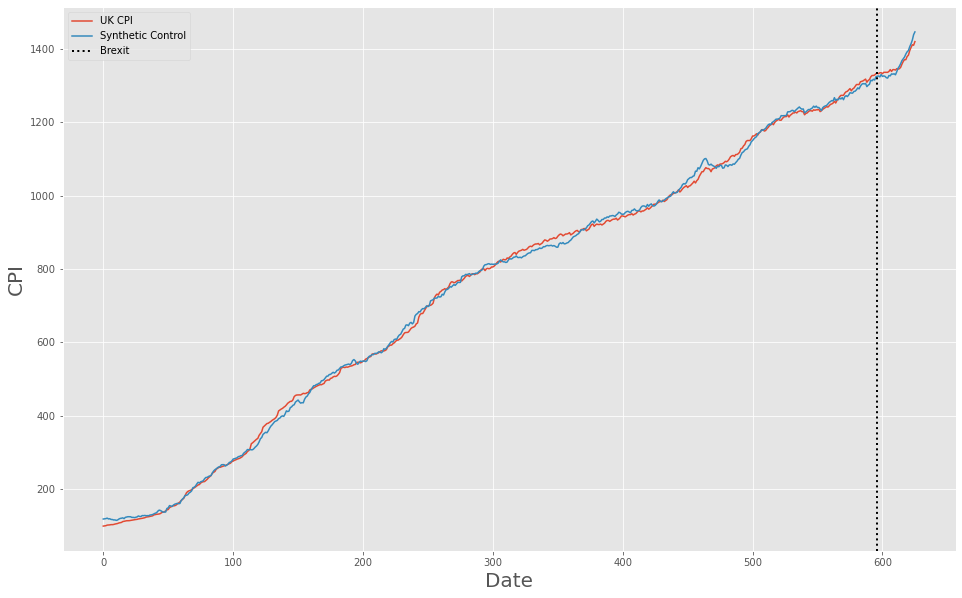

In [18]:
from sklearn.linear_model import LinearRegression
weights_lr = LinearRegression(fit_intercept=False).fit(X, y).coef_
weights_lr.round(5)
wlr = weights_lr.round(5).reshape(7,1)

UK_synth_lr = X.dot(wlr)

plt.figure(figsize=(16,10))
plt.plot(y, label="UK CPI")
plt.plot(UK_synth_lr, label="Synthetic Control")
plt.axvline(x=596, linestyle=':', lw=2,label="Brexit", color="Black")
plt.xlabel('Date',fontsize=20,verticalalignment='top')
plt.ylabel('CPI',fontsize=20,horizontalalignment='center')
plt.legend();

No handles with labels found to put in legend.


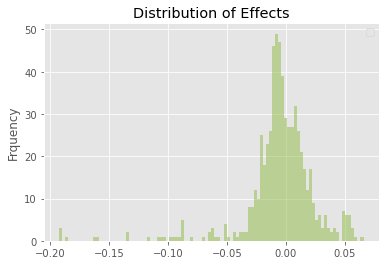

In [19]:
Brexit_effect = (y-UK_synth_lr)/y 
_, bins, _ = plt.hist(Brexit_effect, bins=100, color="C5", alpha=0.5);
plt.ylabel("Frquency")
plt.title("Distribution of Effects")
plt.legend();

## 6.0.1 Conclusion

This papers looks at the relationship between CPI growth and at the impact of Brexit in the context of the UK economy. The significant economic costs of CPI uncertainty are well established in the literature. Higher uncertainty implies more frequent negotiations of nominal contracts, undermines the economic agents’ task to distinguish between nominal and relative price changes and may adversely affect real activity. The results from symmetric, asymmetric and component GARCH inflation models indicate a positive relationship between past CPI volatility and uncertainty about future CPI, in line with the Friedman–Ball causal link. The result implication for UK, the Brexit will increase the volatility of CPI, but it will not have a significant impact on the trend of CPI.